## Day 2 – Exploratory Data Analysis (EDA)

Objective:
To explore patterns, distributions, and relationships in Spotify song data using exploratory data analysis techniques.

This analysis focuses on understanding how track popularity relates to audio features such as energy, danceability, and valence, while also examining artist-level trends.  
Dataset link:https://www.kaggle.com/datasets/lehaknarnauli/spotify-datasets


## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Step 2:Load Datasets

In [2]:
artists = pd.read_csv("artists.csv")
tracks = pd.read_csv("tracks.csv")

In [3]:
artists.head()
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


## Step3: Clean Column Names

In [4]:
def clean_columns(df):
    df.columns = (
        df.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
    )
    return df

artists = clean_columns(artists)
tracks = clean_columns(tracks)

## Step4: Initial Data Inspection 

In [5]:
artists.info()
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104346 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672

In [6]:
artists.isnull().sum()
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

## Step5: Handle Missing Values

In [7]:
tracks = tracks.dropna()
artists = artists.dropna()

## Step6: Remove Duplicates

In [8]:
artists = artists.drop_duplicates()
tracks = tracks.drop_duplicates()

## Step7: Validate Key Columns

In [9]:
tracks = tracks[
    (tracks["popularity"] >= 0) &
    (tracks["popularity"] <= 100)]

## Step8: Merge Tracks with Artists

In [10]:
spotify = tracks.merge(artists,left_on="artists",right_on="id",how="left")

In [11]:
spotify.head()

,id_x,name_x,popularity_x,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,id_y,followers,genres,name_y,popularity_y
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.7440,0.151,0.127,104.851,3,NaN,NaN,NaN,NaN,NaN
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.0000,0.148,0.655,102.009,1,NaN,NaN,NaN,NaN,NaN
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.0218,0.212,0.457,130.418,5,NaN,NaN,NaN,NaN,NaN
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.9180,0.104,0.397,169.980,3,NaN,NaN,NaN,NaN,NaN
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.1300,0.311,0.196,103.220,4,NaN,NaN,NaN,NaN,NaN


## Step 9: Rename Columns Clearly

In [12]:
spotify = spotify.rename(columns={
    "id_x": "track_id",
    "name_x": "track_name",
    "popularity_x": "track_popularity",
    "id_y": "artist_id",
    "name_y": "artist_name",
    "popularity_y": "artist_popularity"
})


In [13]:
spotify.columns

Index(['track_id', 'track_name', 'track_popularity', 'duration_ms', 'explicit',
       'artists', 'id_artists', 'release_date', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'artist_id', 'followers', 'genres', 'artist_name', 'artist_popularity'],
      dtype='object')

## Exploratory Data Analysis (EDA)

## Step10 : Popularity Distribution (Matplotlib)

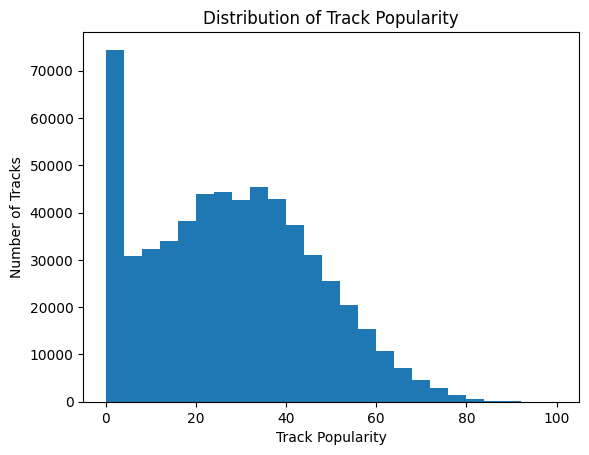

In [14]:
plt.figure()
plt.hist(spotify["track_popularity"], bins=25)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Number of Tracks")
plt.show()


## Step11: Explicit vs Non-Explicit (Track Popularity)

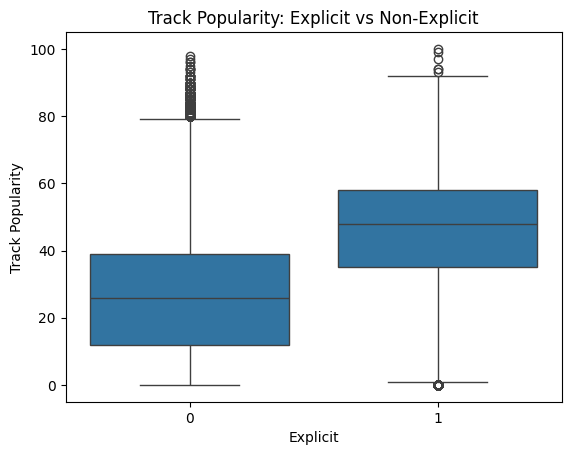

In [15]:
plt.figure()
sns.boxplot(
    data=spotify,
    x="explicit",
    y="track_popularity"
)
plt.title("Track Popularity: Explicit vs Non-Explicit")
plt.xlabel("Explicit")
plt.ylabel("Track Popularity")
plt.show()

## Step 12: Energy vs Danceability

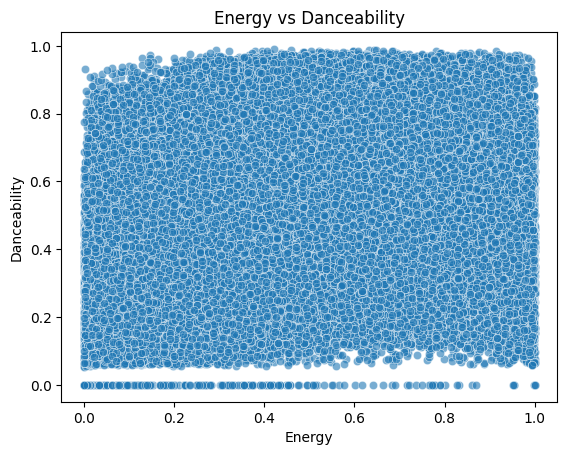

In [16]:
plt.figure()
sns.scatterplot(
    data=spotify,
    x="energy",
    y="danceability",
    alpha=0.6
)
plt.title("Energy vs Danceability")
plt.xlabel("Energy")
plt.ylabel("Danceability")
plt.show()

## Step13 : Interactive Distribution of Track Popularity

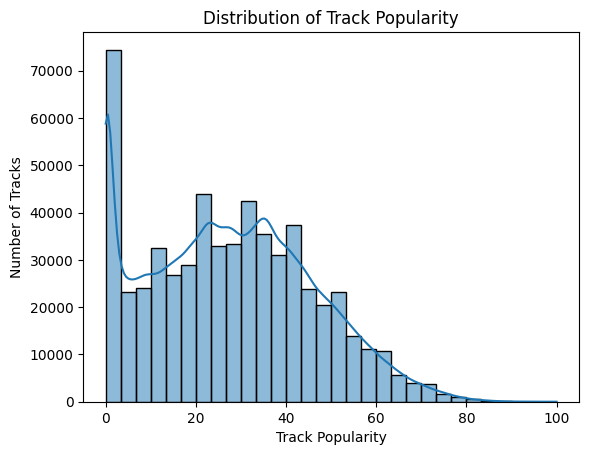

In [17]:
plt.figure()
sns.histplot(
    data=spotify,
    x="track_popularity",
    bins=30,
    kde=True
)
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Number of Tracks")
plt.show()


## Conclusion

This exploratory data analysis focused on understanding the distribution and relationships within Spotify track data using Python.

Key observations from the analysis include:
- Track popularity is not evenly distributed; most tracks fall into lower popularity ranges, with a smaller number of highly popular tracks.
- Explicit content alone does not guarantee higher popularity, indicating that listener preference depends on more than lyrical content.
- Relationships between audio features such as energy, danceability, and popularity are present but not strong enough to fully explain track success.
- Interactive visualizations helped explore the data more effectively and identify patterns that are not immediately visible through summary statistics.

Overall, this analysis demonstrates how exploratory data analysis helps uncover patterns, validate assumptions, and guide deeper investigation before building models or dashboards.
